### Подключение библиотек

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import os

import numpy as np
import cv2

### Превращаем КТ в набор слайсов

In [3]:
CT_PATH_FILE = os.path.join("assets", "input.nii.gz")
CT_SLICES_DIR = os.path.join("output", "slices")

if not os.path.exists(CT_SLICES_DIR):
  os.mkdir(CT_SLICES_DIR)

In [4]:
nii_path = CT_PATH_FILE

nii_img = nib.load(nii_path)

nii_data = nii_img.get_fdata()

output_dir = CT_SLICES_DIR
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i in range(nii_data.shape[2]):
    plt.imshow(nii_data[:, :, i], cmap="gray")
    plt.axis("off")
    plt.savefig(os.path.join(output_dir, f"slice_{i}.png"), bbox_inches="tight", pad_inches=0)
    plt.clf()

<Figure size 640x480 with 0 Axes>

### Анализируем контуры на слайсе

In [5]:
INPUT_FILE = os.path.join(CT_SLICES_DIR, "slice_164.png")
OUTPUT_FILE = os.path.join("output", "contoured_slice.png")

Смотрим на разные tresholds

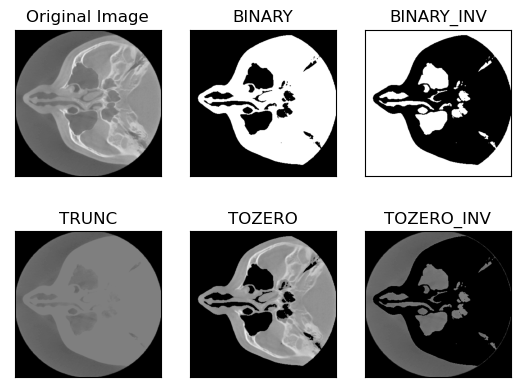

In [6]:
img = cv2.imread(INPUT_FILE, cv2.IMREAD_GRAYSCALE)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Выделяем контуры

In [7]:
img = cv2.imread(INPUT_FILE)

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower = np.array([0, 0, 70])
upper = np.array([179, 179, 130])
mask = cv2.inRange(img_hsv, lower, upper)

cv2.imshow("Image", mask)

mask_blur = cv2.GaussianBlur(mask, (3, 3), 1)
_, thresh = cv2.threshold(mask_blur, 200, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img, contours, -1, (255, 0, 0), 3)
cv2.imwrite(OUTPUT_FILE, img)

True